# 1. Load libaries

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras import regularizers, optimizers 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline


# 2. Load data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 13s 0us/step


In [3]:
print(x_train.shape)
print(type(x_train))

(50000, 32, 32, 3)
<class 'numpy.ndarray'>


# 3. Data Normalization

In [4]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train = x_train/255.0
x_test  = x_test/255.0

#### He initialization - solution 3 for gradient vanishing with many hidden layers


In [5]:
initializer = tf.keras.initializers.he_normal()

In [6]:
# model - 12 layer - relu
model8 = keras.models.Sequential()
model8.add(tf.keras.Input(shape=(32, 32, 3)))

initializer = tf.keras.initializers.he_normal()


model8.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.MaxPooling2D(2))

model8.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.MaxPooling2D(2))

model8.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.MaxPooling2D(2))

model8.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.MaxPooling2D(2))

# flatten
model8.add(keras.layers.Flatten())
model8.add(keras.layers.Dense(512, activation='relu', kernel_initializer = initializer))
model8.add(keras.layers.Dense(10, activation='softmax'))
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 256)         590080    
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 256)         590080    
          

In [7]:
# optimizer and loss
# opt = tf.keras.optimizers.Adam(0.0001)
model8.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history8 = model8.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, 
                    epochs=100, verbose = 2)

Epoch 1/100
196/196 - 38s - loss: 2.0087 - sparse_categorical_accuracy: 0.2537 - val_loss: 1.6022 - val_sparse_categorical_accuracy: 0.3891 - 38s/epoch - 195ms/step
Epoch 2/100
196/196 - 19s - loss: 1.4311 - sparse_categorical_accuracy: 0.4641 - val_loss: 1.3294 - val_sparse_categorical_accuracy: 0.5116 - 19s/epoch - 98ms/step
Epoch 3/100
196/196 - 21s - loss: 1.1470 - sparse_categorical_accuracy: 0.5837 - val_loss: 1.1395 - val_sparse_categorical_accuracy: 0.5839 - 21s/epoch - 106ms/step
Epoch 4/100
196/196 - 19s - loss: 0.9223 - sparse_categorical_accuracy: 0.6688 - val_loss: 1.0965 - val_sparse_categorical_accuracy: 0.6087 - 19s/epoch - 98ms/step
Epoch 5/100
196/196 - 19s - loss: 0.7581 - sparse_categorical_accuracy: 0.7317 - val_loss: 0.8315 - val_sparse_categorical_accuracy: 0.7108 - 19s/epoch - 98ms/step
Epoch 6/100
196/196 - 20s - loss: 0.6249 - sparse_categorical_accuracy: 0.7804 - val_loss: 0.7572 - val_sparse_categorical_accuracy: 0.7518 - 20s/epoch - 105ms/step
Epoch 7/100
1

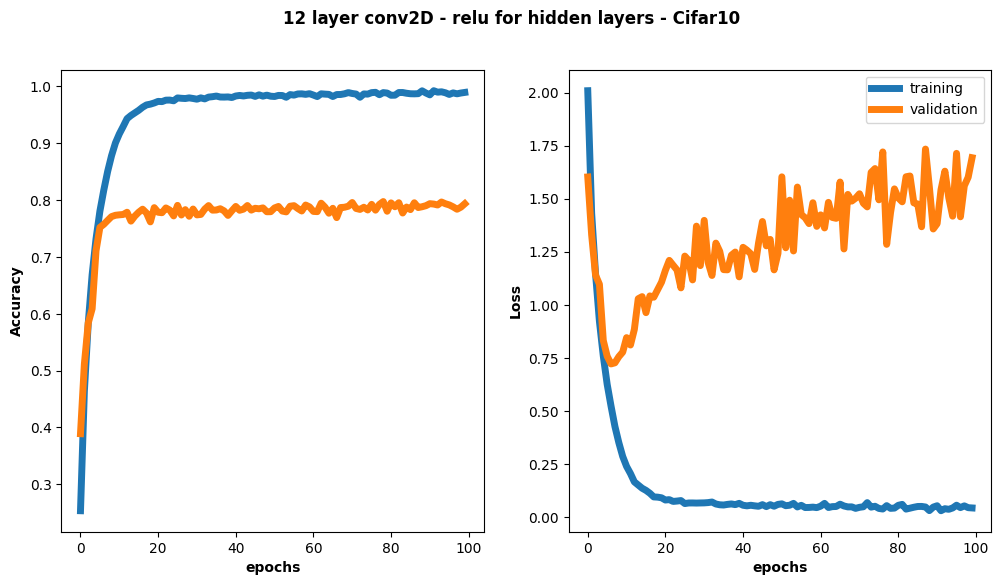

In [10]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(history8.history['sparse_categorical_accuracy'])), history8.history['sparse_categorical_accuracy'], label='training', linewidth = 5)
axs[0].plot(range(len(history8.history['val_sparse_categorical_accuracy'])), history8.history['val_sparse_categorical_accuracy'], label='validation', linewidth = 5)
axs[1].plot(range(len(history8.history['loss'])), history8.history['loss'], label='training', linewidth = 5)
axs[1].plot(range(len(history8.history['val_loss'])), history8.history['val_loss'], label='validation', linewidth = 5)
axs[0].set_xlabel("epochs", fontweight = 'bold')
axs[1].set_xlabel("epochs", fontweight = 'bold')
axs[0].set_ylabel("Accuracy", fontweight = 'bold')
axs[1].set_ylabel("Loss", fontweight = 'bold')
plt.legend()
fig.suptitle("12 layer conv2D - relu for hidden layers - Cifar10", fontweight = 'bold')
plt.show()